# LAB 3
## DATA PREPROCESSING


Demonstrate the following preprocessing  methods for the given datasets
1. Label encoder and one-hot encoder
2. Missing value handling
3. Outlier detection
4. Horizontal and vertical slicing of data frame

In [3]:
# IMPORTING THE LIBRARIES
import pandas as pd
import seaborn as sns

### Loading the Datasets

In [4]:
mush = pd.read_csv("mushrooms.csv")

In [5]:
bank = pd.read_csv("bank.csv")

In [6]:
amphi = pd.read_csv("amphibian.csv")

# DATA PREPROCESSING ON MUSHROOM DATASET

In [7]:
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

**Data Insights**:

- All the columns are categorical in nature.
- There are no missing values present in the dataset.

##### Checking for all column names and it's unique values

In [9]:
print(mush.columns)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [10]:
for column in mush.columns:
    unique_values = mush[column].unique()
    print(f"Column '{column}': {unique_values}")

Column 'class': ['p' 'e']
Column 'cap-shape': ['x' 'b' 's' 'f' 'k' 'c']
Column 'cap-surface': ['s' 'y' 'f' 'g']
Column 'cap-color': ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Column 'bruises': ['t' 'f']
Column 'odor': ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Column 'gill-attachment': ['f' 'a']
Column 'gill-spacing': ['c' 'w']
Column 'gill-size': ['n' 'b']
Column 'gill-color': ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Column 'stalk-shape': ['e' 't']
Column 'stalk-root': ['e' 'c' 'b' 'r' '?']
Column 'stalk-surface-above-ring': ['s' 'f' 'k' 'y']
Column 'stalk-surface-below-ring': ['s' 'f' 'y' 'k']
Column 'stalk-color-above-ring': ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Column 'stalk-color-below-ring': ['w' 'p' 'g' 'b' 'n' 'e' 'y' 'o' 'c']
Column 'veil-type': ['p']
Column 'veil-color': ['w' 'n' 'o' 'y']
Column 'ring-number': ['o' 't' 'n']
Column 'ring-type': ['p' 'e' 'l' 'f' 'n']
Column 'spore-print-color': ['k' 'n' 'u' 'h' 'w' 'r' 'o' 'y' 'b']
Column 'population': ['s' 'n' 'a' 'v' 'y' '

### IMPLEMENTING LABEL ENCODING IN THE COLUMNS 'cap-color' AND 'odor'.

### Label Encoding in cap-color
- Feature cap-color has the following values and notations
-- [‘cap-color’ = [ ‘brown’=n, ‘buff’=b, ‘cinnamon’=c, ‘gray’=g, ‘green’=r, ‘pink’=p, ‘purple’=u, ‘red’=e, ‘white’=w, ‘yellow’=y]].

In [11]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Encode 'cap-color'
mush['cap-color_encoded'] = label_encoder.fit_transform(mush['cap-color'])

# Encode 'odor'
mush['odor_encoded'] = label_encoder.fit_transform(mush['odor'])

# Display the encoded columns
print(mush[['cap-color', 'cap-color_encoded', 'odor', 'odor_encoded']].head())


  cap-color  cap-color_encoded odor  odor_encoded
0         n                  4    p             6
1         y                  9    a             0
2         w                  8    l             3
3         w                  8    p             6
4         g                  3    n             5


In [12]:
# cap-color after label encoding
mush['cap-color'].value_counts()

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

Data Insights:

- Implementation of Label Encoding is actually not efficent in this data.

- Here a color have a value associated with it that was worth more than another. I didn't want n(brown)  which became a 4 to be worth twice as much as e(red) which became a 2 — since brown isn't more important than red.

### One hot encoding on cap-color

- Uses a technique called .get_dummies().
- Basically this creates a new column for every attribute for every feature.
- So here there will be 10 columns.
- Each column would be completely filled with zeros except where the specific attribute is present.

In [13]:
# Perform one-hot encoding for the 'cap-color' column
mush = pd.read_csv("mushrooms.csv")
one_hot_encoded = pd.get_dummies(mush['cap-color'], prefix='cap-color')
one_hot_encoded.head()



,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0


In [14]:
# Concatenate the one-hot encoded columns with the original DataFrame
mush_encoded = pd.concat([mush, one_hot_encoded], axis=1)

# Drop the original 'cap-color' column if you don't need it anymore
mush_encoded.drop('cap-color', axis=1, inplace=True)

# Display the first few rows of the DataFrame with one-hot encoding
mush_encoded.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y
0,p,x,s,t,p,f,c,n,k,e,...,0,0,0,0,1,0,0,0,0,0
1,e,x,s,t,a,f,c,b,k,e,...,0,0,0,0,0,0,0,0,0,1
2,e,b,s,t,l,f,c,b,n,e,...,0,0,0,0,0,0,0,0,1,0
3,p,x,y,t,p,f,c,n,n,e,...,0,0,0,0,0,0,0,0,1,0
4,e,x,s,f,n,f,w,b,k,t,...,0,0,0,1,0,0,0,0,0,0


Similarly we can apply the One-hot encoding to convert all the categorical columns to numerical columns.

**Disadvatage**:

- Would cause the number of columns to increase dramatically

In [15]:
mush_encoded.columns

Index(['class', 'cap-shape', 'cap-surface', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat',
       'cap-color_b', 'cap-color_c', 'cap-color_e', 'cap-color_g',
       'cap-color_n', 'cap-color_p', 'cap-color_r', 'cap-color_u',
       'cap-color_w', 'cap-color_y'],
      dtype='object')

-  one hot encoding would cause the number of columns to increase dramatically


In [16]:
# X = pd.concat([pd.get_dummies(mush[col], drop_first = True) for col in mush], axis=1, keys=mush.columns)
# X.head()

-  This does not take into account that I dropped the first attribute for each column, helping to further reduce the total number

One Hot Encoding is implemented insead of Label Encoding since it reduces the number of columns before modelling

In [17]:
# Perform one-hot encoding for the 'cap-color' column
one_hot_encoded = pd.get_dummies(mush_encoded['ring-type'], prefix='ring-type')
one_hot_encoded.head()


,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0


In [18]:
# Concatenate the one-hot encoded columns with the original DataFrame
mush_encoded = pd.concat([mush_encoded, one_hot_encoded], axis=1)

# Drop the original 'cap-color' column if you don't need it anymore
mush_encoded.drop('ring-type', axis=1, inplace=True)

# Display the first few rows of the DataFrame with one-hot encoding
mush_encoded.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,p,x,s,t,p,f,c,n,k,e,...,0,0,0,0,0,0,0,0,0,1
1,e,x,s,t,a,f,c,b,k,e,...,0,0,0,0,1,0,0,0,0,1
2,e,b,s,t,l,f,c,b,n,e,...,0,0,0,1,0,0,0,0,0,1
3,p,x,y,t,p,f,c,n,n,e,...,0,0,0,1,0,0,0,0,0,1
4,e,x,s,f,n,f,w,b,k,t,...,0,0,0,0,0,1,0,0,0,0


In [19]:
mush_encoded.columns

Index(['class', 'cap-shape', 'cap-surface', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'spore-print-color', 'population', 'habitat', 'cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'ring-type_e', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p'],
      dtype='object')

In [20]:
cols = ['cap-color_b',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'ring-type_e', 'ring-type_f', 'ring-type_l',
       'ring-type_n', 'ring-type_p']
mush_encoded[cols].head()

,cap-color_b,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0


This is the result of One-hot encoding on just 2 columns. Two columns are now 15 columns.

## Missing Value Handling

In [21]:
mush_encoded.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
spore-print-color           0
population                  0
habitat                     0
cap-color_b                 0
cap-color_c                 0
cap-color_e                 0
cap-color_g                 0
cap-color_n                 0
cap-color_p                 0
cap-color_r                 0
cap-color_u                 0
cap-color_w                 0
cap-color_y                 0
ring-type_e                 0
ring-type_f                 0
ring-type_

**Data Insights**:
- There are no missing values on the dataset.

## OUTLIER DETECTION

- Since we have nominal data there is no point in doing Outlier Detection.

##  Horizontal and Vertical slicing of data frame

### Vertical Slicing
- Selecting specific columns.

In [22]:
vertical_slice = mush_encoded[['population', 'habitat']]
vertical_slice.head()

,population,habitat
0,s,u
1,n,g
2,n,m
3,s,u
4,a,g


## Horizontal Slicing
- Selecting specific rows.


In [23]:
horizontal_slice = mush_encoded[(mush_encoded['population'] == 's') & (mush_encoded['habitat'] == 'u')]
horizontal_slice.head()

,class,cap-shape,cap-surface,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,p,x,s,t,p,f,c,n,k,e,...,0,0,0,0,0,0,0,0,0,1
3,p,x,y,t,p,f,c,n,n,e,...,0,0,0,1,0,0,0,0,0,1
18,p,x,y,t,p,f,c,n,n,e,...,0,0,0,1,0,0,0,0,0,1
19,p,x,s,t,p,f,c,n,k,e,...,0,0,0,0,0,0,0,0,0,1
31,p,x,y,t,p,f,c,n,k,e,...,0,0,0,1,0,0,0,0,0,1


Combined Slicing
- Selecting specific rows and specific columns.

In [24]:
combined_slice = mush_encoded.loc[(mush_encoded['population'] == 's') & (mush_encoded['gill-size'] == 'n'), ['class', 'bruises', 'odor']]
combined_slice.head()

,class,bruises,odor
0,p,t,p
3,p,t,p
17,p,t,p
18,p,t,p
19,p,t,p


## Slicing the encoded columns

In [25]:
# Using iloc to select the one-hot encoded columns related to 'ring-type'
ring_type_columns = mush_encoded.iloc[:, mush_encoded.columns.str.startswith('ring-type_')]

# Printing out the selected columns
ring_type_columns.head()

,ring-type_e,ring-type_f,ring-type_l,ring-type_n,ring-type_p
0,0,0,0,0,1
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,1,0,0,0,0


# Bank Dataset

In [26]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no


In [27]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        12740 non-null  int64  
 1   job        12740 non-null  object 
 2   marital    12739 non-null  object 
 3   education  12739 non-null  object 
 4   default    12739 non-null  object 
 5   balance    12739 non-null  float64
 6   housing    12739 non-null  object 
 7   loan       12739 non-null  object 
 8   contact    12739 non-null  object 
 9   day        12739 non-null  float64
 10  month      12739 non-null  object 
 11  duration   12739 non-null  float64
 12  campaign   12739 non-null  float64
 13  pdays      12739 non-null  float64
 14  previous   12739 non-null  float64
 15  poutcome   12739 non-null  object 
 16  y          12739 non-null  object 
dtypes: float64(6), int64(1), object(10)
memory usage: 1.7+ MB


**Data Insights**
- The columns contain no null values.
- There are 10 categorical column and 7 numercial columns.

In [28]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,12740.000000,12739.000000,12739.000000,12739.000000,12739.000000,12739.0,12739.0
mean,40.689796,1182.210927,15.291153,256.067666,2.831619,-1.0,0.0
std,9.413752,2635.786054,8.460659,256.562321,3.393142,0.0,0.0
min,20.000000,-3372.000000,1.000000,0.000000,1.000000,-1.0,0.0
25%,33.000000,48.000000,7.000000,105.000000,1.000000,-1.0,0.0
50%,39.000000,387.000000,15.000000,181.000000,2.000000,-1.0,0.0
75%,48.000000,1263.000000,21.000000,315.000000,3.000000,-1.0,0.0
max,61.000000,58544.000000,30.000000,3881.000000,63.000000,-1.0,0.0


# LABEL ENCODING

- EDUCATION COLUMN

In [29]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary', nan], dtype=object)

In [30]:
education_mapping = {
    'unknown': 0,
    'primary': 1,
    'secondary': 2,
    'tertiary': 3
}
label_encoder = LabelEncoder()
bank['education_encoded'] = bank['education'].map(education_mapping)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_encoded
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,3.0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,2.0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,2.0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,0.0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,0.0


- LOAN COLUMN

In [31]:
bank['loan'].unique()

array(['no', 'yes', nan], dtype=object)

In [32]:
label_encoder = LabelEncoder()
bank['loan_encoded'] = label_encoder.fit_transform(bank['loan'])
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,education_encoded,loan_encoded
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,may,261.0,1.0,-1.0,0.0,unknown,no,3.0,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,may,151.0,1.0,-1.0,0.0,unknown,no,2.0,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,may,76.0,1.0,-1.0,0.0,unknown,no,2.0,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,may,92.0,1.0,-1.0,0.0,unknown,no,0.0,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,may,198.0,1.0,-1.0,0.0,unknown,no,0.0,0


In [33]:
# Label encoded columns
bank[['education_encoded', 'loan_encoded']].head()

,education_encoded,loan_encoded
0,3.0,0
1,2.0,0
2,2.0,1
3,0.0,0
4,0.0,0


## ONE HOT ENCODING

- EDUCATION COLUMN

In [34]:
education_one_hot = pd.get_dummies(bank['education'], prefix='education')
bank = pd.concat([bank, education_one_hot], axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,pdays,previous,poutcome,y,education_encoded,loan_encoded,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,-1.0,0.0,unknown,no,3.0,0,0,0,1,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,-1.0,0.0,unknown,no,2.0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,-1.0,0.0,unknown,no,2.0,1,0,1,0,0
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,-1.0,0.0,unknown,no,0.0,0,0,0,0,1
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,-1.0,0.0,unknown,no,0.0,0,0,0,0,1


- LOAN COLUMN

In [35]:
loan_one_hot = pd.get_dummies(bank['loan'], prefix='loan')
bank = pd.concat([bank, loan_one_hot], axis=1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,poutcome,y,education_encoded,loan_encoded,education_primary,education_secondary,education_tertiary,education_unknown,loan_no,loan_yes
0,58,management,married,tertiary,no,2143.0,yes,no,unknown,5.0,...,unknown,no,3.0,0,0,0,1,0,1,0
1,44,technician,single,secondary,no,29.0,yes,no,unknown,5.0,...,unknown,no,2.0,0,0,1,0,0,1,0
2,33,entrepreneur,married,secondary,no,2.0,yes,yes,unknown,5.0,...,unknown,no,2.0,1,0,1,0,0,0,1
3,47,blue-collar,married,unknown,no,1506.0,yes,no,unknown,5.0,...,unknown,no,0.0,0,0,0,0,1,1,0
4,33,unknown,single,unknown,no,1.0,no,no,unknown,5.0,...,unknown,no,0.0,0,0,0,0,1,1,0


# Slicing

In [36]:
# Using iloc to select the one-hot encoded columns related to 'ring-type'
encoded_columns = bank.iloc[:, bank.columns.str.startswith('education_', 'loan_')]

# Printing out the selected columns
encoded_columns.head()

,education_encoded,education_primary,education_secondary,education_tertiary,education_unknown
0,3.0,0,0,1,0
1,2.0,0,1,0,0
2,2.0,0,1,0,0
3,0.0,0,0,0,1
4,0.0,0,0,0,1


# Missing value handling

In [37]:
bank.isna().sum()

age                    0
job                    0
marital                1
education              1
default                1
balance                1
housing                1
loan                   1
contact                1
day                    1
month                  1
duration               1
campaign               1
pdays                  1
previous               1
poutcome               1
y                      1
education_encoded      1
loan_encoded           0
education_primary      0
education_secondary    0
education_tertiary     0
education_unknown      0
loan_no                0
loan_yes               0
dtype: int64

**Data Insights**
- No missing values exist in the dataset.

# OUTLIER IDENTIFICATION

- An outlier is an observation that is unlike the other observations. It is rare, or distinct, or does not fit in some way. It is also called anomalies.

Causes of Outliers

- Measurement.
-  Data corruption.
-  True outlier observation.

Outliers are of two types:
1. Univariate: Found when we look at distribution of a single variable.
2. Multivariate: Outliers in an n-dimensional space.



These are the main methods for finding the outliers.
1. Interquartile range.
2. Standard Deviation.
3. Z score.

In [38]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12740 entries, 0 to 12739
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  12740 non-null  int64  
 1   job                  12740 non-null  object 
 2   marital              12739 non-null  object 
 3   education            12739 non-null  object 
 4   default              12739 non-null  object 
 5   balance              12739 non-null  float64
 6   housing              12739 non-null  object 
 7   loan                 12739 non-null  object 
 8   contact              12739 non-null  object 
 9   day                  12739 non-null  float64
 10  month                12739 non-null  object 
 11  duration             12739 non-null  float64
 12  campaign             12739 non-null  float64
 13  pdays                12739 non-null  float64
 14  previous             12739 non-null  float64
 15  poutcome             12739 non-null 

<Axes: xlabel='age'>

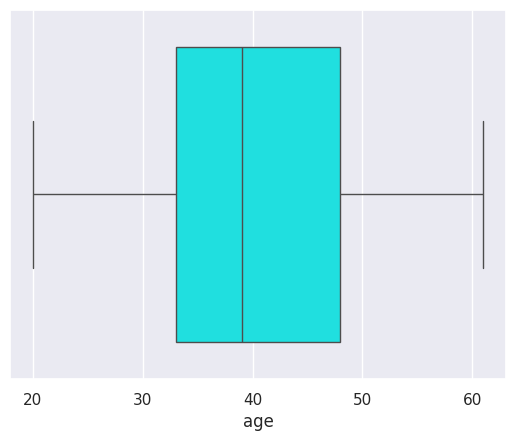

In [39]:
sns.set(style="darkgrid")
sns.boxplot(x = bank['age'], color = 'cyan')

Data Insights:
-  We can clearly observe that there are outliers present in the age column.


### INTERQUARTILE RANGE METHOD

- Used to measure the statistical dispersion and data variability by dividing the dataset into quartiles.
-  Difference between the third quartile and the first quartile.
- Outliers in this case are;
  - Lower Whisker: Q1 - 1.5x IQR.
  - Upper Whisker: Q3 + 1.5x IQR

In [40]:
def find_outliers_iqr(data):
    # Calculate the first quartile (Q1)
    Q1 = data.quantile(0.25)
    # Calculate the third quartile (Q3)
    Q3 = data.quantile(0.75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Define the lower and upper bounds for outliers detection
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Find outliers
    outliers = (data < lower_bound) | (data > upper_bound)
    print("Outliers detected:", outliers.sum())
    print("The lower bound value is ", lower_bound)
    print("The upper bound value is ", upper_bound)
    print("Indices of outliers:", outliers[outliers].index)

outliers = find_outliers_iqr(bank['age'])

Outliers detected: 0
The lower bound value is  10.5
The upper bound value is  70.5
Indices of outliers: Int64Index([], dtype='int64')


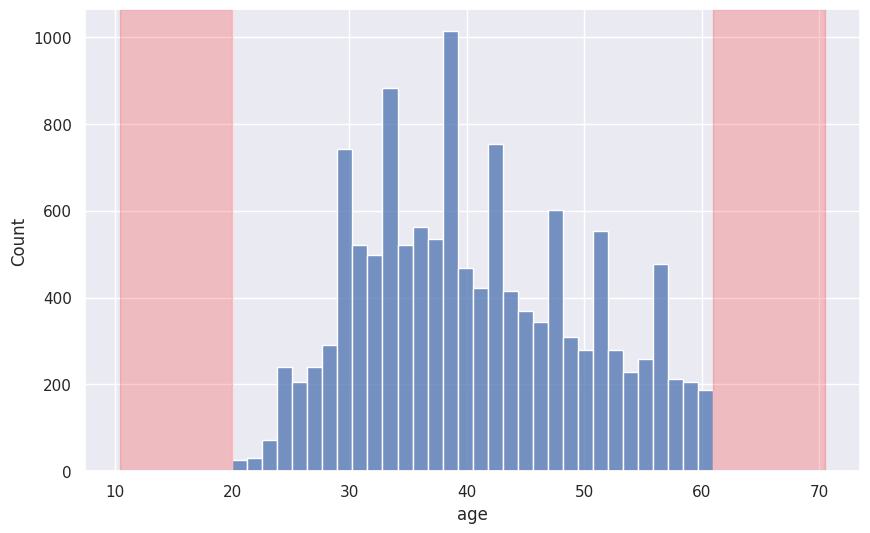

0        58
1        44
2        33
3        47
4        33
         ..
12735    59
12736    31
12737    42
12738    45
12739    37
Name: age, Length: 12740, dtype: int64

In [41]:
import matplotlib.pyplot as plt

# Assuming 'df_1' is your DataFrame and 'chol' is the column for which you want to visualize outliers
plt.figure(figsize=(10, 6))

# Plotting histogram
sns.histplot(bank['age'], kde=False)

# Calculating lower and upper bounds for outliers detection
Q1 = bank['age'].quantile(0.25)
Q3 = bank['age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Shading the outlier regions
plt.axvspan(xmin= bank['age'].min(), xmax=lower_bound, alpha=0.2, color='red')
plt.axvspan(xmin=upper_bound, xmax= bank['age'].max(), alpha=0.2, color='red')

plt.show()
bank['age']

**Data Insights**:
- Here the red zone represents the outlier zone! The records present in that zone are considered as outliers

<Axes: xlabel='age'>

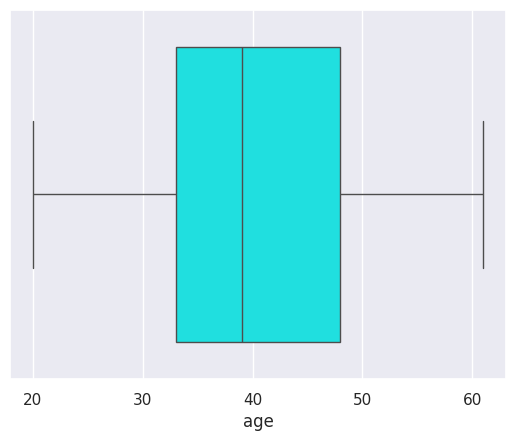

In [42]:
bank_new = bank[(bank['age'] < upper_bound) & (bank['age'] > lower_bound)]
sns.boxplot(x = bank_new['age'], color = 'cyan')

## AMPHIBIANS DATASET

In [43]:
amphi.head()

,Integer,Categorical,Numerical,Numerical.1,Categorical.1,Categorical.2,Categorical.3,Categorical.4,Categorical.5,Categorical.6,...,3,Label.3,4,Label.4,5,Label.5,6,Label.6,7,Unnamed: 30
0,ID,Motorway,SR,NR,TR,VR,SUR1,SUR2,SUR3,UR,...,toad,Fire-bellied,toad,Tree,frog,Common,newt,Great,crested,newt
1,1,A1,600,1,1,4,6,2,10,0,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,A1,700,1,5,1,10,6,10,3,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,A1,200,1,5,1,10,6,10,3,...,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,A1,300,1,5,0,6,10,2,3,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
amphi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Integer        190 non-null    object
 1   Categorical    190 non-null    object
 2   Numerical      190 non-null    object
 3   Numerical.1    190 non-null    object
 4   Categorical.1  190 non-null    object
 5   Categorical.2  190 non-null    object
 6   Categorical.3  190 non-null    object
 7   Categorical.4  190 non-null    object
 8   Categorical.5  190 non-null    object
 9   Categorical.6  190 non-null    object
 10  Categorical.7  190 non-null    object
 11  Numerical.2    190 non-null    object
 12  Ordinal        190 non-null    object
 13  Ordinal.1      190 non-null    object
 14  Categorical.8  190 non-null    object
 15  Categorical.9  190 non-null    object
 16  Label          190 non-null    object
 17  1              190 non-null    object
 18  Label.1        190 non-null   

Data Insights:
- All the columns are categorical in nature.

MISSING VALUE INTERPRETATION

In [45]:
amphi.isna().sum()

Integer            0
Categorical        0
Numerical          0
Numerical.1        0
Categorical.1      0
Categorical.2      0
Categorical.3      0
Categorical.4      0
Categorical.5      0
Categorical.6      0
Categorical.7      0
Numerical.2        0
Ordinal            0
Ordinal.1          0
Categorical.8      0
Categorical.9      0
Label              0
1                  0
Label.1            0
2                  0
Label.2            0
3                  0
Label.3            0
4                189
Label.4          189
5                189
Label.5          189
6                189
Label.6          189
7                189
Unnamed: 30      189
dtype: int64

In [46]:
amphi['Categorical.3'].unique()

array(['SUR1', '6', '10', '2', '1', '7', '14', '9', '4'], dtype=object)

In [47]:
amphi['Label.4'].value_counts()


Tree    1
Name: Label.4, dtype: int64

In [48]:
# identifying columns with missing values
columns_with_missing_values = amphi.columns[amphi.isnull().any()]

# Impute missing values in each column with the mean of that column
for column in columns_with_missing_values:
    # Assuming you want to use mean imputation for non-null object columns
    if amphi[column].dtype == 'object':
        amphi[column].fillna(amphi[column].mode()[0], inplace=True)
    else:
        # For numerical columns, you can use mean or median imputation
        amphi[column].fillna(amphi[column].mean(), inplace=True)

# Alternatively, you can use interpolation for object columns
# for column in columns_with_missing_values:
#     amphi[column].interpolate(method='linear', inplace=True)

# After imputation, you can verify that there are no missing values left
print(amphi.isnull().sum())

Integer          0
Categorical      0
Numerical        0
Numerical.1      0
Categorical.1    0
Categorical.2    0
Categorical.3    0
Categorical.4    0
Categorical.5    0
Categorical.6    0
Categorical.7    0
Numerical.2      0
Ordinal          0
Ordinal.1        0
Categorical.8    0
Categorical.9    0
Label            0
1                0
Label.1          0
2                0
Label.2          0
3                0
Label.3          0
4                0
Label.4          0
5                0
Label.5          0
6                0
Label.6          0
7                0
Unnamed: 30      0
dtype: int64


In [49]:
amphi['Label.4'].value_counts()

Tree    190
Name: Label.4, dtype: int64

In [50]:
# Linear Interpolation: Suitable for linear dataset.
for column in columns_with_missing_values:
     amphi[column].interpolate(method='linear', inplace=True)

CONCLUSION
In this lab we did the basic preprocessing operations such as Encoding(Label,One-hot), Dealing with missing values, Identifying the outliers, Horizontal and vertical slicing of data frame.
